In [230]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import sklearn

In [243]:
#nltk.download_shell()
media = pd.read_csv('Desktop/Imbalanced Data set/Media/train.csv')
media_eval = pd.read_csv('Desktop/Imbalanced Data set/Media/evaluation.csv')

In [148]:
media[0:3]

,storeId,url,additionalAttributes,breadcrumbs,label,length_breadcrumbs,length_additionalAttributes
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books,39,171
1,NaN,Not Available,Not Available,best buy > computers & tablets > computer card...,rest,91,13
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music,88,110


In [45]:
print(len(media))

603201


In [263]:
media.describe()

,storeId,url,additionalAttributes,breadcrumbs,label
count,213951,213951,213951,599800,603201
unique,166,201510,199742,63126,4
top,22,https://www.walmart.com/ip/Strings-N-Stripes-G...,Country of Origin=United States,books,rest
freq,48000,6,405,16039,389250


In [265]:
media_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442041 entries, 0 to 442040
Data columns (total 5 columns):
storeId                 53450 non-null object
url                     53450 non-null object
additionalAttributes    53450 non-null object
breadcrumbs             441130 non-null object
id                      442041 non-null int64
dtypes: int64(1), object(4)
memory usage: 16.9+ MB


In [16]:
media.groupby('label').describe()

additionalAttributes  \
label                                                              
books  count                                               95811   
       unique                                              94689   
       top     Format=Record book;Series Name=Grow a Thousand...   
       freq                                                   86   
music  count                                               59996   
       unique                                              50560   
       top                                      edition=Audio CD   
       freq                                                  274   
rest   count                                                   0   
       unique                                                  0   
       top                                                   NaN   
       freq                                                  NaN   
videos count                                               58144   
       unique                                              54496   
       top                       Country of Origin=United States   
       freq                                                  398   

                                                     breadcrumbs storeId  \
label                                                                      
books  count                                               92410   95811   
       unique                                              19169      18   
       top                                                 books      22   
       freq                                                16039   16000   
music  count                                               59996   59996   
       unique                                               4853      93   
       top                                                 music    2627   
       freq                                                16000   16000   
rest   count                                              389250       0   
       unique                                              32762       0   
       top      home  >  decor  >  curtains & window treatmen...     NaN   
       freq                                                13703     NaN   
videos count                                               58144   58144   
       unique                                               6342      65   
       top       target > movies, music & books > movies > drama      22   
       freq                                                 3094   16000   

                                                             url  
label                                                             
books  count                                               95811  
       unique                                              94890  
       top     https://www.barnesandnoble.com/w/little-women-...  
       freq                                                    4  
music  count                                               59996  
       unique                                              50894  
       top     https://www.walmart.com/ip/Golden-Suits-Dlcd-O...  
       freq                                                    6  
rest   count                                                   0  
       unique                                                  0  
       top                                                   NaN  
       freq                                                  NaN  
videos count                                               58144  
       unique                                              55728  
       top             http://www.amazon.com/dp/B00GQQ77IU?psc=1  
       freq                                                    4

In [258]:
media_null = media.isnull().sum() #To check the values in each cols
media_eval_null = media_eval.isnull().sum()

In [262]:
media_eval_null

storeId                 388591
url                     388591
additionalAttributes    388591
breadcrumbs                911
id                           0
dtype: int64

In [266]:
## Filling the NA Values
media['url'] = media['url'].fillna('Not Available')
media['additionalAttributes'] = media['additionalAttributes'].fillna('Not Available')
media['breadcrumbs'] = media['breadcrumbs'].fillna('Not Available')

In [267]:
# Filling the NA Values
media_eval['url'] = media_eval['url'].fillna('Not Available')
media_eval['additionalAttributes'] = media_eval['additionalAttributes'].fillna('Not Available')
media_eval['breadcrumbs'] = media_eval['breadcrumbs'].fillna('Not Available')

In [268]:
media[0:100]

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,Not Available,Not Available,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music
5,22,http://www.target.com/p/footprint-focus-guide-...,Number of Pages=175;Store Item Number (DPCI)=2...,"target > movies, music & books > books > trave...",books
6,23,https://www.walmart.com/ip/Within-Reach/34635290,Performer=Theory Of Flight;1.=Track Listing No...,music on cd or vinyl > rock music on cd or vin...,music
7,NaN,Not Available,Not Available,11320,rest
8,NaN,Not Available,Not Available,home & garden > home decor > decorative access...,rest
9,24,http://www.amazon.com/dp/6305463530?psc=1,"Writers=Jack Hill, David Kidd;Format=Color, Do...",movies & tv > genre for featured categories > ...,videos


In [269]:
media_eval[0:100]

,storeId,url,additionalAttributes,breadcrumbs,id
0,NaN,Not Available,Not Available,baby products > bathing & skin care > washclot...,8589934592
1,NaN,Not Available,Not Available,online shopping > home & garden > art gal...,8589934593
2,NaN,Not Available,Not Available,home goods > kitchen & dining > table linens &...,8589934594
3,NaN,Not Available,Not Available,11320,8589934595
4,NaN,Not Available,Not Available,tools & home improvement > kitchen & bath fixt...,8589934596
5,NaN,Not Available,Not Available,best buy > cameras & camcorders > digital came...,8589934597
6,NaN,Not Available,Not Available,clothing > boys > boys' jackets & outerwear,8589934598
7,NaN,Not Available,Not Available,target > clothing > women's clothing > ...,8589934599
8,NaN,Not Available,Not Available,"target > sports, fitness & outdoors > fan shop...",8589934600
9,NaN,Not Available,Not Available,toys & games,8589934601


In [72]:
media['length_breadcrumbs'] = media['breadcrumbs'].apply(len)
media['length_additionalAttributes'] = media['additionalAttributes'].apply(len)

In [75]:
%matplotlib inline

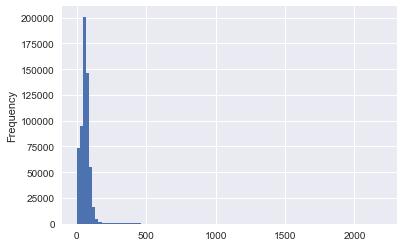

In [78]:
media['length_breadcrumbs'].plot.hist(bins=100)

[0, 1500, 0, 450000]

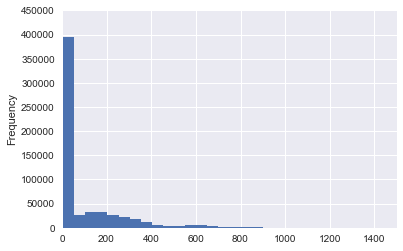

In [87]:
media['length_additionalAttributes'].plot.hist(bins=100).axis([0,1500,0,450000])

In [88]:
media['length_breadcrumbs'].describe()

count    603201.000000
mean         63.993420
std          50.104872
min           2.000000
25%          44.000000
50%          60.000000
75%          78.000000
max        2195.000000
Name: length_breadcrumbs, dtype: float64

In [89]:
media['length_additionalAttributes'].describe()

count    603201.000000
mean        103.706143
std         165.516358
min           5.000000
25%          13.000000
50%          13.000000
75%         153.000000
max        4977.000000
Name: length_additionalAttributes, dtype: float64

In [92]:
media[media['length_breadcrumbs'] == 2195]['breadcrumbs'].iloc[0]

'books > literature & fiction > genre fiction > gothic > books > literature & fiction > genre fiction > horror > dark fantasy > books > mystery thriller & suspense > thrillers & suspense > supernatural > books > mystery thriller & suspense > thrillers & suspense > suspense > books > romance > gothic > books > romance > romantic suspense > books > romance > science fiction > books > science fiction & fantasy > fantasy > epic > books > science fiction & fantasy > fantasy > historical > books > science fiction & fantasy > fantasy > paranormal & urban > books > science fiction & fantasy > science fiction > adventure > books > science fiction & fantasy > science fiction > dystopian > books > science fiction & fantasy > science fiction > genetic engineering > books > science fiction & fantasy > science fiction > hard science fiction > books > science fiction & fantasy > science fiction > post-apocalyptic > books > science fiction & fantasy > science fiction > space opera > kindle store > kin

In [96]:
media[media['length_additionalAttributes'] == 4977]['additionalAttributes'].iloc[0]

"49.=I Just Like Him (Ireland 1965);2.=Airport (Ireland 1965);36.=Airport Ireland (Director's Cut);15.=Around Around (Ireland 1965);31.=The Band Interview (Producer's Cut);75.=The Train (Producer's Cut);34.=Credits (Producer's Cut);78.=Priest And The Poor Boy (Producer's Cut);23.=Ireland And The Fans (Producer's Cut);132.=Show Intro;56.=Premature Evacuation (Ireland 1965);101.=Time Is On My Side (Live);8.=Premature Evacuation (Ireland 1965);13.=Salty Dog (Ireland 1965);98.=Heart Of Stone (Stereo Version);88.=The Last Time (Director's Cut);69.=Opening Credits And Meeting The Band (Producer's Cut);43.=The Band Interviews (Director's Cut);26.=I'm Alright Riot (Producer's Cut);63.=Around Around (Ireland 1965);73.=The Last Time (Producer's Cut);21.=Opening Credits And Meeting The Band (Producer's Cut);28.=Family Portrait (Producer's Cut);60.=All Of It's Acting Really (Ireland 1965);81.=Going Home (Producer's Cut);119.=Show Intro;30.=Priest And The Poor Boy (Producer's Cut);114.=Subconscious

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137e8a828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121769be0>]], dtype=object)

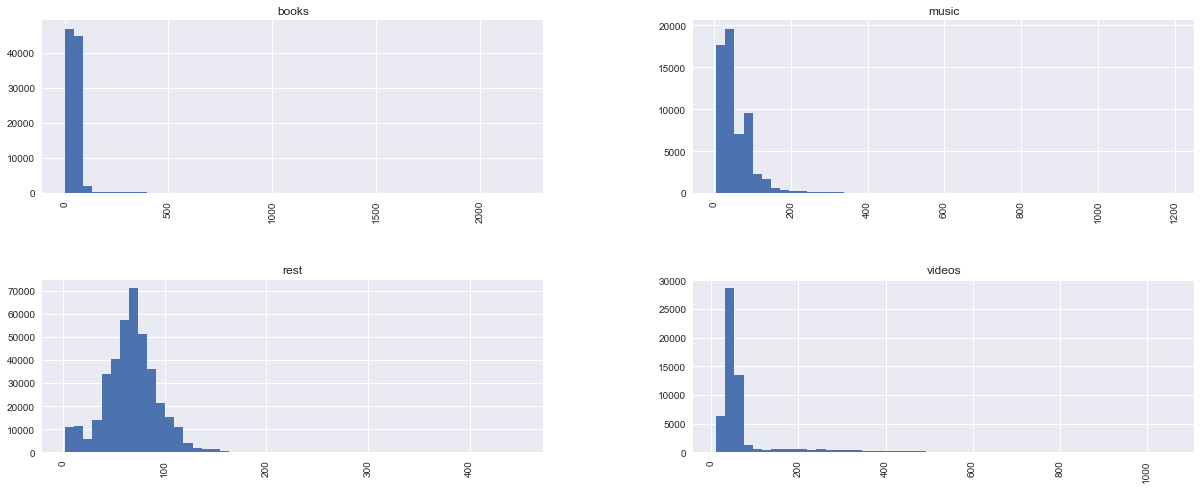

In [103]:
media.hist(column = 'length_breadcrumbs',by = 'label',bins = 50,figsize = (20,8))
#Checking the length of breadcrumbs and plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137ebb208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13a179c50>]], dtype=object)

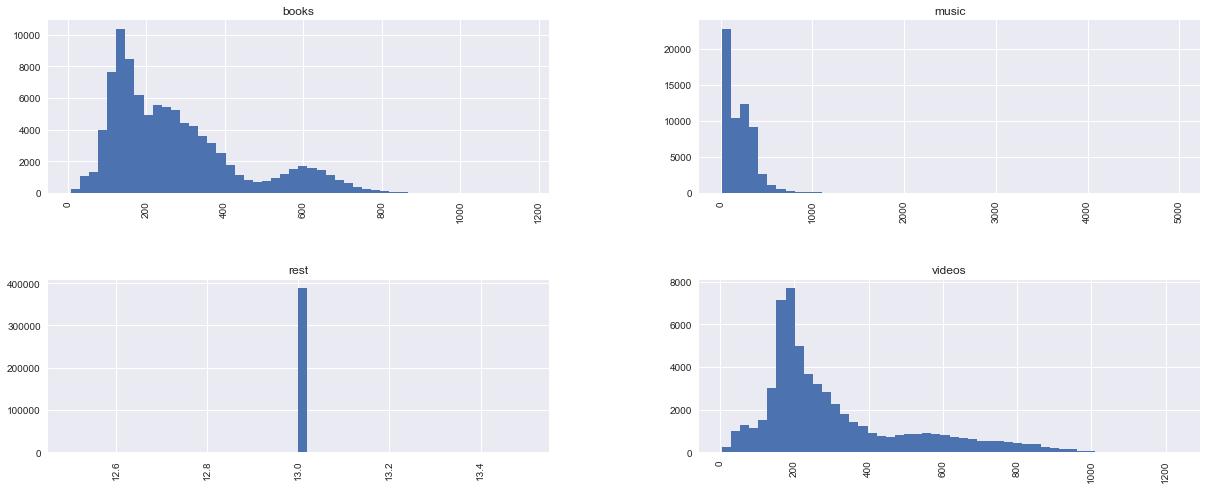

In [105]:
media.hist(column = 'length_additionalAttributes',by = 'label',bins = 50,figsize = (20,8))
#Checking the length of additionalattributes and plotting

In [175]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [251]:
def text_cleanup(med_data):
    """
    1. Remove Punctuation
    2. Remove stop words
    3. Return a list of clean text
    4. Stemming of the words performed
    """
    
    rm_punc = [char for char in med_data if char not in string.punctuation]
    rm_punc = ''.join(rm_punc)
    stemmer =  PorterStemmer()
    rm_punc = stemmer.stem(rm_punc)
    
    return [word for word in rm_punc.split() if word.lower() not in stopwords.words('english')]

In [254]:
media['breadcrumbs'].head(5).apply(text_cleanup)

0                [books, art, music, photography, mus]
1    [best, buy, computers, tablets, computer, card...
2    [music, cd, vinyl, rock, music, cd, vinyl, alt...
3    [books, media, books, cooking, food, books, ge...
4         [target, movies, music, books, music, class]
Name: breadcrumbs, dtype: object

In [255]:
media_eval['breadcrumbs'].head(5).apply(text_cleanup)

0    [baby, products, bathing, skin, care, washclot...
1    [online, shopping, home, garden, art, gallery,...
2    [home, goods, kitchen, dining, table, linens, ...
3                                              [11320]
4    [tools, home, improvement, kitchen, bath, fixt...
Name: breadcrumbs, dtype: object

In [256]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 

In [270]:
# Generating the countVectorizer for training set
bow_trans = CountVectorizer(analyzer=text_cleanup).fit(media['breadcrumbs'])  

In [273]:
print(len(bow_trans.vocabulary_)) ##Printing the length

20908


In [181]:
media_mess = media['breadcrumbs'][4]

In [182]:
media_mess

'target > movies, music & books > music > classical'

In [191]:
bowt = bow_trans.transform([media_mess])

In [195]:
print(bowt)  
print(bowt.shape)  ## Printing the shape

  (0, 2228)	1
  (0, 3693)	1
  (0, 12883)	1
  (0, 13010)	2
  (0, 18667)	1
(1, 20908)


In [196]:
print(bow_trans.get_feature_names()[13010]) ## Finding the words which appear twice

music


In [275]:
## To generate bag of words count and vocabulary has been fitted for training set
media_message = bow_trans.transform(media['breadcrumbs'])
media_message.shape

(603201, 20908)

In [300]:
## Baf of words Transformation of the evaluation set and fiited vocabulary of the training set
media_eval_message1 = bow_trans.transform(media_eval['breadcrumbs'])

In [198]:
media_message.nnz

3635189

In [218]:
#Sparsity of the training set
print (100 * media_message.nnz / (media_message.shape[0]*media_message.shape[1]))

0.028823880677194273


In [277]:
#Sparsity of the evaluation set
print (100 * media_eval_message.nnz / (media_eval_message.shape[0]*media_eval_message.shape[1]))

0.045234199756758395


In [278]:
### TFIDF Implementation on training set
media_tfidf = TfidfTransformer().fit(media_message)

In [280]:
tfidf_trans = media_tfidf.transform(bowt)

In [281]:
print(tfidf_trans)

  (0, 18667)	0.265205014074
  (0, 13010)	0.594636769994
  (0, 12883)	0.296078661455
  (0, 3693)	0.64045197001
  (0, 2228)	0.279700040442


In [282]:
media_message_tfidf = media_tfidf.transform(media_message)

In [304]:
## TFIDF Implemation of evaluation set
media_eval_tfidf1 = TfidfTransformer().fit(media_eval_message1)

In [305]:
media_eval_message_tfidf1 = media_eval_tfidf.transform(media_eval_message1)

In [322]:
print (media_eval_message_tfidf1.shape)

(442041, 20908)


In [231]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

In [284]:
## Naive bayes classfier
media_classfication = MultinomialNB().fit(media_message_tfidf,media['label'])

In [233]:
media_classfication.predict(tfidf_trans)

array(['music'], 
      dtype='<U6')

In [234]:
media['label'][4]

'music'

In [235]:
media_predict = media_classfication.predict(media_message_tfidf)  # Predicting the training set

In [306]:
media_eval_predict = media_classfication.predict(media_eval_message_tfidf1)  #Predicting the evaluation set

In [307]:
print(media_eval_predict)

['rest' 'rest' 'rest' ..., 'rest' 'rest' 'music']


In [314]:
media_eval['label'] = media_eval_predict

In [321]:
writer = pd.DataFrame(media_eval).to_csv('media_eval.csv')

In [312]:
accuracy_score(media['label'],media_predict)  #Accuracy Score of the training set 

0.9969827636227393

In [236]:
print (media_predict)  #Train Prediction

['books' 'rest' 'music' ..., 'rest' 'books' 'rest']


In [313]:
confusion_matrix(media['label'], media_predict)  # Confusion Matrix of the training set

array([[ 94960,     50,    615,    186],
       [     1,  59522,      9,    464],
       [   149,     29, 389019,     53],
       [   259,      3,      2,  57880]])

In [242]:
classification_report(media['label'], media_predict)  #Precision, Recall, F1 Score of Training set

'             precision    recall  f1-score   support\n\n      books       1.00      0.99      0.99     95811\n      music       1.00      0.99      1.00     59996\n       rest       1.00      1.00      1.00    389250\n     videos       0.99      1.00      0.99     58144\n\navg / total       1.00      1.00      1.00    603201\n'